# Description

We already have trained models, so we need to evaluate and compare their performance. We will evaluate each model using a confusion matrix and a classification report (it includes important metrics like precision, recall, F1, and accuracy)

# Import libraries

In [19]:
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the test data

In [20]:
test_df = pd.read_csv('../data/processed/test.csv')

X_test = test_df.drop(columns=['Loan_Approved'])
y_test = test_df['Loan_Approved']

# Load models

In [21]:
lr = joblib.load('../models/logistic_regression.joblib')
svm = joblib.load('../models/svm.joblib')
rf = joblib.load('../models/random_forest.joblib')
gbc = joblib.load('../models/gradient_boosting.joblib')

# Function for evaluation

To reduce repeated code, we implement a function to evaluate a model. As parameters, we have model – the model to evaluate, X_test – the test data, and y_test – the test labels.

This function includes:
- getting predictions from the model
- getting and visualizing the confusion matrix
- getting and printing the classification report

In [22]:
def evaluate(model, X_test, y_test):

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    cr = classification_report(y_test, y_pred)
    print(cr)

# Logistic regression 

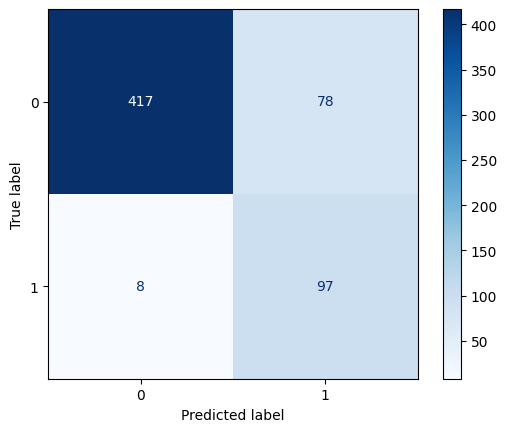

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       495
           1       0.55      0.92      0.69       105

    accuracy                           0.86       600
   macro avg       0.77      0.88      0.80       600
weighted avg       0.91      0.86      0.87       600



In [24]:
evaluate(lr, X_test, y_test)

We see that the model performs well on class 0. On class 1, it has good recall but a low precision value. The model identifies class 1 quite well but often predicts class 0 as class 1.

# SVM

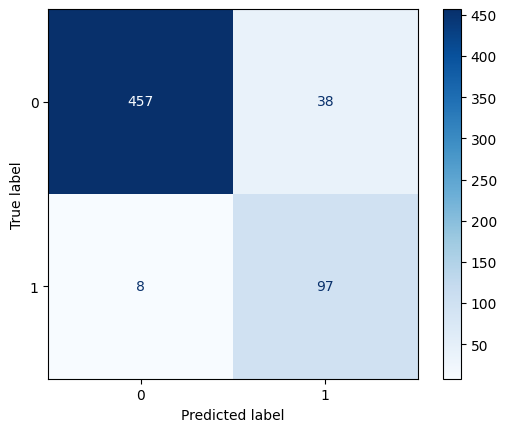

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       495
           1       0.72      0.92      0.81       105

    accuracy                           0.92       600
   macro avg       0.85      0.92      0.88       600
weighted avg       0.94      0.92      0.93       600



In [25]:
evaluate(svm, X_test, y_test)

We see a situation similar to logistic regression, but SVM has a better precision value, so the model predicts class 0 as class 1 less often than logistic regression.

# Random forest

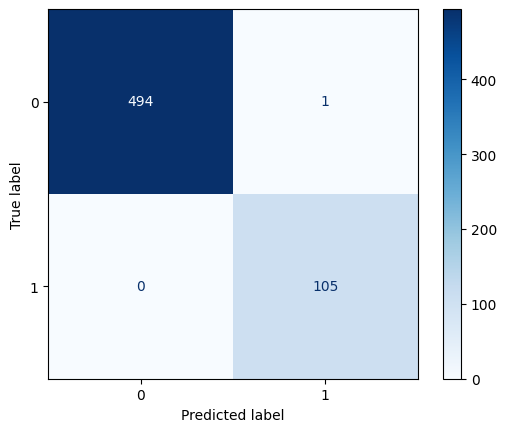

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       0.99      1.00      1.00       105

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [26]:
evaluate(rf, X_test, y_test)

We see really good performance, with each metric having a value close to 1.

# Gradient boosting

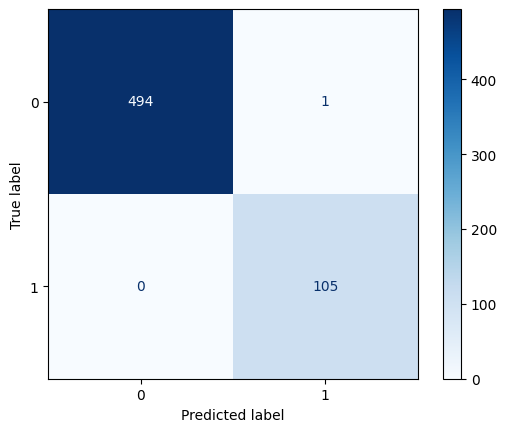

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       0.99      1.00      1.00       105

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [27]:
evaluate(gbc, X_test, y_test)

Gradient boosting, like random forest, has good performance, with each metric having a value close to 1.

# Feature importance

Our best models are random forest and gradient boosting – interpretable models. So we can check which features influence the decision the most.

In [35]:
importances = rf.best_estimator_.feature_importances_

features = ['Age', 'Income', 'Credit score', 'Loan amount', 'Loan term', 'Employed_Status_Employed', 'Employed_Status_Self-Employed', 'Employed_Status_Unemployed']
importances_series = pd.Series(importances, index=features)

importances_series.sort_values(inplace=True, ascending=False)

importances_series

Credit score                     0.568418
Loan amount                      0.286232
Income                           0.117299
Age                              0.012243
Loan term                        0.010653
Employed_Status_Employed         0.002005
Employed_Status_Self-Employed    0.001834
Employed_Status_Unemployed       0.001315
dtype: float64

We see that credit score influences the model decisions the most. Loan amount and income also have a big impact. Other features, like age and employment status, hardly influence the model decisions.

# Conclusion

During evaluation, we see that random forest and gradient boosting are almost perfect models, while logistic regression and SVM have a problem with class 1. This can be related to the nature of the data, because in the EDA we saw that the data is non-linear separable, which explains why logistic regression has the worst performance. SVM performs better than logistic regression but still has a problem with class 1. Other algorithms, random forest and gradient boosting, work very well on non-linear data. Credit score, loan amount, and income influence the model decisions the most. In the EDA, in the pairplot and correlation table, we saw that these features stand out from the rest.